# Nested Fixed Point (NFXP) estimator

“Dynamic programming and structural estimation” mini course

Fedor Iskhakov

Reading: **Rust (1987) "Optimal Replacement of GMC Bus Engines: An Empirical Model of Harold Zurcher"**


## Harold Zurcher problem

The model without the error terms has the following Bellman equation:

\begin{equation}
V(x) = \max_{d\in C} \big\{ u(x,d) + \beta E\big[ V(x')\big|x,d\big] \big\}
\end{equation}

Choice space is $C = \{0,1\} = \{\text{keep},\text{replace}\}$

\begin{equation}
    \ u(x_{t},d_t,\theta_1)=\left \{ 
    \begin{array}{ll}
        -RC-c(0,\theta_1) & \text{if }d_{t}=1 \\ 
        -c(x_{t},\theta_1) & \text{if }d_{t}=0%
    \end{array} \right.
\end{equation}

$x_{t+1} \sim F(x_t,d_t)$

## Transition matrix for mileage when $d=0$

$\Pi(d=0)_{n x n} = 
\begin{pmatrix}
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
0 & \pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & 0 \\
0 & 0 &\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & \cdot & \cdot & 0 & \pi_0 & \pi_1 & \pi_2 & 0 \\
0 & \cdot & \cdot & \cdot & 0 & \pi_0 & \pi_1 & \pi_2 \\
0 & \cdot & \cdot & \cdot & \cdot  & 0 & \pi_0 & 1-\pi_0 \\
0 & \cdot & \cdot & \cdot & \cdot & \cdot  & 0 & 1
\end{pmatrix}$


## Transition matrix for mileage, $d=1$

$\Pi(d=1)_{n x n} = 
\begin{pmatrix}
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
\pi_0 & \pi_1 & \pi_2 & 0 & \cdot & \cdot & \cdot & 0 \\
\end{pmatrix}$

## Bellman operator

Bellman equation can be written as a fixed point equation of the **Bellman operator** in the functional space

$$
T(V)(x) \equiv \max_{d \in C} \big\{ u(x,d) + \beta E\big[ V(x') \big|x,d\big] \big\}
$$

The Bellman equations is then $ V(x) = T({V})(x) $, with the
solution given by the fixed point $ T({V}) = V $

## Making the model suitable for empirical work

- Zurcher observes many different attributes of the busses that come into the shop
- But we as an econometrician do not!
- Yet, these are likely to be the reason for observing different behavior in same states (mileage)

**Error terms $\varepsilon$**

## Rust assumptions

1. Additive separability in preferences (**AS**)

$$
u(x,\varepsilon,d) = u(x,d) + \varepsilon[d],
$$

2. Conditional independence (**CI**) in the transition probabilities of the joint state process $(x,\varepsilon)$

$$
p(x',\varepsilon'|x,\varepsilon,d) = q(\varepsilon'|x')\cdot \pi(x'|x,d)
$$

3. Extreme value Type I (EV1) distribution of $\varepsilon$ (**EV**)

### What Rust assumptions allow:

\begin{equation}
V(x,\varepsilon) = \max_{d\in C} \big\{ u(x,d) + \varepsilon[d] + \beta 
\int_{X} \int_{\Omega} V(x',\varepsilon') \pi(x'|x,d) q(\varepsilon'|x') dx' d\varepsilon' \big\}
\end{equation}

1. Separate out the deterministic part of choice specific value $v(x,d)$ (assumptions SA and CI)

2. Compute the expectation of maximum using properties of EV1 (assumption EV)


\begin{equation}
V(x,\varepsilon) = \max_{d\in C} \big\{ u(x,d) + \beta 
\int_{X} \Big( \int_{\Omega} V(x',\varepsilon') q(\varepsilon'|x') d\varepsilon'\Big)
\pi(x'|x,d) dx'
+ \varepsilon[d] \big\}
\end{equation}


\begin{equation}
v(x,d) = u(x,d) + \beta E\big[ V(x',\varepsilon')\big|x,d\big]
\end{equation}

\begin{equation}
V(x',\varepsilon') = \max_{d\in C} \big\{ v(x',d) + \varepsilon'[d] \big\}
\end{equation}

\begin{equation}
E\big[ V(x',\varepsilon')\big|x,d\big] = 
\int_{X} \log \big( \exp[v(x',0)] + \exp[v(x',1)] \big) \pi(x'|x,d) dx'
\end{equation}




## Bellman equation in expected value function space

Let $EV(x,d)$ denote the expected value function, then we have

\begin{equation}
EV(x,d) = \int_{X} \log \big( \exp[u(x',0) + \beta EV(x',0)] + \exp[u(x',1) + \beta EV(x',1)] \big) \pi(x'|x,d) dx'
\end{equation}

In the form of the operator

$$
T^*(EV)(x,d) \equiv \int_{X} \log \big( \exp[u(x',0) + \beta EV(x',0)] + \exp[u(x',1) + \beta EV(x',1)] \big) \pi(x'|x,d) dx'
$$

Solution to the Bellman functional equation $EV(x,d)$ is also a fixed point of $T^*$ operator, $T^*(EV)(x,d)=EV(x,d)$




## Benefits of Rust's approach

- Bellman operator in expected terms is also a contraction mapping
- Dimentionality of this fixed point problem is smaller that the one in value function terms (because of $\varepsilon$)
- It is also numerically easier to work with smooth expected values $EV(x,d)$ rather than $V(x,\varepsilon)$

- Later we'll also see a very nice numerical optimization possibilities

## Choice probabilities

Once the fixed point is found, the *optimal* choice probability $P(d|x)$ is given by the Logit structure (assumption EV):

\begin{equation}
P(d|x) = \frac{\exp[v(x,d)]}{\sum_{d'\in C} \exp[v(x,d')]}
= \frac{\exp\big[u(x,d) + \beta EV_{\theta}(x,d)\big]}{\sum_{d'\in C} \exp\big[u(x,d') + \beta EV_{\theta}(x,d')\big]}
\end{equation}

The choice probability serve as the **bases for forming the likelihood function**

## Log-likelihood function for the Zurcher model

- Data $Z = \{d_{it},x_{it}\}$, where $t\in\{0,\dots,T\}$ are time periods, and $i\in\{0,\dots,n\}$ are individual buses, in Rust (1987) 162 busses of 8 types
- Structural parameters $\theta = (\beta,\theta_1,\theta_2)$, where $\theta_1$ is a vector of parameters in preferences/costs, and $\theta_2$ is a vector of parameters in transition proabilities of the mileage process

\begin{equation}
l_i(\theta,EV_{\theta})= \sum_{t=1}^{T} \log P(d_{it}|x_{it},\theta_1) + \sum_{t=1}^{T} \log \pi(x_{it}|x_{i,t-1},\theta_2)
\end{equation}

Note: expected value functions $EV_{\theta}$ are needed for calcualtion of choice probabilites $P(d_{it}|x_{it},\theta_1)$

## NFXP estimator

\begin{equation}
logL(\theta, EV_{\theta}) = \sum_{i=0}^{n} l_i(\theta, EV_{\theta}) \longrightarrow \max_{\theta}
\end{equation}

1. **Outer loop:** maximization with respect to $\theta$
    - More precisely w.r.t. $\theta_1$ if $\theta_2$ is estimated outside of the structural model
2. **Inner loop:** sokution of the dynamic program to compute $EV_{\theta}$ for each value of parameter $\theta$ 



## How to compute $EV_{\theta}$

1. Value function iterations = successive approaximations (SA)
    - slow for $\beta$ close to 1
    - globally convergent to unique solution because Bellman operator is contraction mapping
2. Newton-Kantorovich iterations = Newton method in functional space (NK)
    - fast when started within the region of attraction
    - may diverge if started outside of region of attraction
3. Polyalgorithm: start with SA and switch to NK when likely to be in the region of attraction
    - robust, work every time
    - involve heuristic rule of when to switch

## Successive approximations (value function iterations)

**Value function iterations (VFI)** 
also known as successive approximations

1. Start with arbitrary guess for $EV(x,d)$
2. Apply $T^*$ operator
3. Check for (uniform) convergence
4. If not converged to a given level of tolerance, return to step 2, otherwise finish.

## Newton-Kantorovich approach

Remember that the solution of the problem (in terms of expected value function EV) is given by

$$
T^*(EV)(x,d)=EV(x,d)
$$

**Because this is an equation, we can solve it as an equation as well!**

## Refresher about the Newton method

Solve the equation $g(x)=0$, for now assume $x\in\mathbb{R}^1$

*Yet, it does work with system of non-linear equations as well!*

1. Start with some good guess $ x_0 $ not too far from the solution
2. Newton step
$$
x_{i+1} = x_i - \frac{g(x_i)}{g'(x_i)} 
$$
3. Iterate until convergence in some metric

## Newton-Kantorovich method

Apply Newton method for the equation

$$
EV(x,d) = \Gamma(EV)(x,d) \quad\Leftrightarrow\quad (I - \Gamma)(EV)(x,d)=\mathbb{0}
$$

The **NK iteration** is

$$
EV_{k+1} = EV_{k} - (I-\Gamma')^{-1} (I-\Gamma)(EV_k)
$$

- The new operator is the difference between the identity operator $I$ and Bellman operator $\Gamma = T^*$, and
$\mathbb{0}$ is zero function, $I-\Gamma'$ is a Frechet derivative of the operator $I-\Gamma$

- In terms of finite dimensional approximation, $\Gamma'$ is an n-by-n matrix of $\Gamma(ev)$ n-by-1 vector differentiated with $ev$ n-by-1 vector


## Poly algorithm

- NK method may not be convergent at the initial point
- Successive apprizimataion (SA) iterations, however, are always convergent

**Poly algorithm** is combination of SA and NK:

1. Start with SA iterations
2. At approximately optimal time switch to NK iterations

## When to switch to NK iterations?

Suppose $EV_{k-1} = EV + C$ (where $EV$ is the fixed point)

$$
err_{k} = ||EV_{k-1}-EV_{k}|| = ||EV+C - T^*(EV+C)|| = ||EV + C - EV - \beta C|| = C (1-\beta)
$$

$$
err_{k+1} = ||EV_{k}-EV_{k+1}|| = ||T^*(EV+C) - T^*(T^*(EV+C))|| = ||EV + \beta C - EV - \beta^2 C|| = \beta C (1-\beta)
$$

- Then the ration of two errors $err_{k+1} \big/ err_{k} = \beta$ when the current apprximation is a constant away from the fixed point.

- NK iteration will immeditely "strip away" the constant

**Thus, switch to NK iteration when $err_{k+1} \big/ err_{k}$ is close to $\beta$**


# Zurcher class

The main code that implements the Zurcher model in Python

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class zurcher():
    '''Harold Zurcher bus engine replacement model class'''

    def __init__(self, 
                 n = 175, # default parameter values
                 mmax = 450,
                 p = [0.0937,0.4475,0.4459,0.0127],
                 RC = 11.7257,
                 c = 2.45569,
                 beta = 0.9999):
        '''Initializator for the zurcher class
           Default values of the parameters come from Table X in Rust (1987), column "Group 1,2,3" 
        '''
        assert sum(p)<=1.0,'sum of transision probability parameters must not exceed unity'
        p.append(1.0-sum(p)) # add the last element to ensure 1.0 in sum
        self.p = np.array(p) # parameters for transision probabilities
        self.n = n           # set number of grid points on the state space
        self.mmax = mmax     # maximum milage
        self.RC = RC         # replacement cost
        self.c = c           # cost function parameter
        self.beta = beta     # discount factor

    @property
    def n(self):
        '''Dimension getter'''
        return self.__n # internal dimension variable

    @n.setter
    def n(self,n):
        '''Dimension setter, updaing the grid and transision probabilities'''
        self.__n = n
        # create gid for the set dimension
        self.grid = np.arange(n) # 0,..,n-1 index of grid points
        # create transition prob for the set dimension
        self.P1,self.P2 = self.transition_probability(self.p) # compute transision probabilities
        
    def __str__(self):
        '''String representation of the Zurcher model object'''
        # id() is unique identifier for the variable (reference), convert to hex
        return 'Zurcher bus engine replacement model with id=%s' % hex(id(self))
    
    def __repr__(self):
        '''Print for Zurcher model object'''
        return self.__str__()

    def transition_probability(self,p):
        '''Compute transition probability matrixes conditional on choice'''
        # conditional on d=0, no replacement
        P1 = np.full((self.n,self.n),0.0)
        for i in range(self.n):
            if i <= self.n-p.size:
                # lines where p vector fits entirely
                P1[i][i:i+p.size]=p
            else:
                P1[i][i:] = p[:self.n-p.size-i]
                P1[i][-1] = 1.0-P1[i][:-1].sum()
        # conditional on d=1, replacement
        P2 = np.full((self.n,self.n),0.0)
        for i in range(self.n):
            P2[i][:p.size]=p
        return P1,P2
        
    def bellman(self,ev0,output=0):
        ''' Bellman operator for the model
            Input: current approximation of the EV as column vector
                   output = type of output requested 
            Output: new approximation of EV
                    d=0 choice probability (if output>0)
                    Frechet derivative of Bellman operator (if output>1)
        '''
        # EV0 is current approximation of EV on the fixed grid
        # For d=0 it holds values for all mileages
        # For d=1 (replacement) we use the first value EV0[0]
        # So, instead of EV(x,d) for d=0,1, we can use only one vector!
        assert np.all(ev0.shape==(self.n,1)),'Expecting EV as column vector'
        x = self.grid.reshape((self.n,1)) # states (in the next period), column vector
        c = 0.001*self.c*x # maintenance cost in all states
        v0 = -c + self.beta*ev0 # value of not replacing
        v1 = -c[0] -self.RC + self.beta*ev0[0] # value of replacing
        # recenter the values for numerical stability of logsum !!!!!!!!!!!!!!!!
        maxv = np.maximum(v0,v1)
        logsum = maxv + np.log(np.exp(v0-maxv) + np.exp(v1-maxv))
        ev1 = self.P1 @ logsum # matrix multiplication, result as column vector
        if output == 0:
            return ev1
        # keep (no replacement) choice probability
        pk = 1/(1+np.exp(v1-v0))
        if output == 1:
            return ev1,pk
        # Frechet derivative
        dev1 = self.beta * self.P1 * pk.transpose()
        dev1[:,0] += self.beta * np.squeeze(self.P1 @ (1-pk))
        return ev1,pk,dev1

    def solve_vfi(self, maxiter=1000, tol=1e-6, callback=None):
        '''Solves the model using successive approximations (VFI)'''
        ev0 = np.full((self.n,1),0) # initial guess of EV
        for iter in range(maxiter):
            ev1,pk = self.bellman(ev0,output=1)
            stp = np.max(abs(ev1-ev0))
            if callback:
                if iter==0: stp0=1.0
                callback(iter,self,ev1,pk,stp,stp/stp0,'sa') # callback for making plots
            if stp < tol: 
                break
            ev0=ev1
            stp0=stp
        else:  # when i went up to maxiter
            raise RuntimeError('No convergence: maximum number of iterations achieved! Increase maxiter')
        return ev1,pk

    def solve_nk(self, maxiter=100, tol=1e-6, callback=None):
        '''Solves the model using the Newton-Kantorovich algorithm'''
        ev0 = np.full((self.n,1),0) # initial guess of EV
        for iter in range(maxiter):
            ev1,pk,dev = self.bellman(ev0,output=2) # compute Frechet derivative
            ev1 = ev0 - np.linalg.inv(np.eye(self.n)-dev) @ (ev0 - ev1) # NK iteration
            stp = np.max(abs(ev1-ev0))
            if callback:
                if iter==0: stp0=1.0
                callback(iter,self,ev1,pk,stp,stp/stp0,'nk') # callback for making plots
            if stp < tol: 
                break
            ev0=ev1
            stp0=stp
        else:  # when i went up to maxiter
            raise RuntimeError('No convergence: maximum number of iterations achieved! Increase maxiter')
        ev1,pk = self.bellman(ev1,output=1) # compute choice probabilities after convergence
        return ev1,pk
    
    def solve_poly(self, 
                   maxiter=100, 
                   tol=1e-10, 
                   sa_min=5,         # minimum number of contraction steps
                   sa_max=25,        # maximum number of contraction steps
                   switch_tol=0.025, # tolerance of the switching rule
                   callback=None):
        '''Solves the model using the poly-algorithm'''
        ev0 = np.full((self.n,1),0) # initial guess of EV
        err0 = 1.0 # initial lagged error
        nk = False # start with successive approximations
        for iter in range(maxiter):
            ev1,pk,dev = self.bellman(ev0,output=2) # compute next iteration with Bellman
            if iter>=sa_max: nk=True # have to switch to NK after sa_max
            err = np.max(abs(ev1-ev0))
            # check if need to switch to NK
            nk = nk or (iter>=sa_min and abs(err/err0 - self.beta)<switch_tol)
            if nk:
                ev1 = ev0 - np.linalg.inv(np.eye(self.n)-dev) @ (ev0 - ev1) # NK step
            if callback:
                itertype = 'nk' if nk else 'sa' # label for the iteration type
                callback(iter,self,ev1,pk,err,err/err0,itertype) # callback for making plots
            if err < tol: 
                break # convergence
            ev0=ev1 # pass new ev approximation to the next iteration as ev0
            err0=err # lagged error for relative error calculation
        else:  # when i went up to maxiter
            raise RuntimeError('No convergence: maximum number of iterations achieved! Increase maxiter')
        ev1,pk = self.bellman(ev1,output=1) # compute choice probabilities after convergence
        return ev1,pk
    
    
    def solve_show(self,solver='vfi',verbose=True,**kvargs):
        '''Illustrate solution for given solver = {vfi,nk,poly} and 
           print errors/relative errors from iterations (when verbose=True)
           All other arguments are passed to the solver
        '''
        fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
        ax1.grid(b=True, which='both', color='0.65', linestyle='-')
        ax2.grid(b=True, which='both', color='0.65', linestyle='-')
        ax1.set_xlabel('Mileage grid')
        ax2.set_xlabel('Mileage grid')
        ax1.set_title('Value function')
        ax2.set_title('Probability of keeping the engine')
        def callback(iter,mod,ev,pk,err,derr,itertype):
            if verbose:
                if iter==0:
                    print('%7s %16s %16s'%('iter','err','err_i/err_i-1'))
                    print('-'*42)
                print('%4d %2s %16.12f %16.12f'%(iter,itertype[:2],err,derr))
            ax1.plot(mod.grid,ev,color='k',alpha=0.25)
            ax2.plot(mod.grid,pk,color='k',alpha=0.25)
        if solver=='vfi':
            ev,pk = self.solve_vfi(callback=callback,**kvargs)
        elif solver=='nk':
            ev,pk = self.solve_nk(callback=callback,**kvargs)
        elif solver=='poly':
            ev,pk = self.solve_poly(callback=callback,**kvargs)
        else:
            raise RuntimeError('Unknown solver in solve_show()')
        # add solutions
        ax1.plot(self.grid,ev,color='r',linewidth=2.5)
        ax2.plot(self.grid,pk,color='r',linewidth=2.5)
        plt.show()
        return ev,pk
    
# print help for all the methods    
# help(zurcher)    
    

In [20]:
# investigate how parts of the code work:
model = zurcher(RC=.5,n=12,p=[0.65,0.2,0.1]) # model instance
model.n=12
# model = zurcher() # model instance
print('Model grid:\n',model.grid)
print(model) # string representation
print('Transition probabilities conditional on not replacing:\n',model.P1)
print('Transition probabilities conditional on replacing:\n',model.P2)
ev,pk = model.bellman(np.full((model.n,1),0),output=1)
print('Bellman one run:\n',ev)
print('Probability of keeping:\n',pk)

Model grid:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
Zurcher bus engine replacement model with id=0x7f85c8a73f90
Transition probabilities conditional on not replacing:
 [[0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.65 0.2  0.15]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.65 0.35]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]
Transition probabilities conditional on replacing:
 [[0.65 0.2  0.1  0.05 0.

   iter              err    err_i/err_i-1
------------------------------------------
   0 sa   0.417013120838   0.417013120838
   1 sa   0.391156382625   0.937995384505
   2 sa   0.364795653493   0.932608209138
   3 sa   0.337661275230   0.925617594390
   4 sa   0.309635199474   0.916999437568
   5 sa   0.280823964802   0.906951035538
   6 sa   0.251604416635   0.895950660094
   7 sa   0.222586067037   0.884666771810
   8 sa   0.194507396121   0.873852522353
   9 sa   0.168198334063   0.864740042886
  10 sa   0.144819827300   0.861006312019
  11 sa   0.125909592015   0.869422332308
  12 sa   0.110610022016   0.878487653292
  13 sa   0.098043145524   0.886385733740
  14 sa   0.087585002036   0.893331212169
  15 sa   0.078778168806   0.899448158649
  16 sa   0.071286858195   0.904906261148
  17 sa   0.064851442426   0.909725075120
  18 sa   0.059279292857   0.914078247755
  19 sa   0.054415354060   0.917948771607
  20 sa   0.050137699439   0.921388830507
  21 sa   0.046353710071   0.9245

 207 sa   0.000002597656   0.949995965336
 208 sa   0.000002467764   0.949996194662
 209 sa   0.000002344367   0.949996420744
 210 sa   0.000002227140   0.949996656232
 211 sa   0.000002115776   0.949996881422
 212 sa   0.000002009981   0.949997106052
 213 sa   0.000001909477   0.949997323863
 214 sa   0.000001813998   0.949997531769
 215 sa   0.000001723294   0.949997740517
 216 sa   0.000001637126   0.949997929810
 217 sa   0.000001555267   0.949998118992
 218 sa   0.000001477501   0.949998287937
 219 sa   0.000001403623   0.949998452917
 220 sa   0.000001333440   0.949998610931
 221 sa   0.000001266767   0.949998752964
 222 sa   0.000001203427   0.949998884752
 223 sa   0.000001143254   0.949999006781
 224 sa   0.000001086091   0.949999120487
 225 sa   0.000001031785   0.949999229962
 226 sa   0.000000980195   0.949999322494
 227 sa   0.000000931185   0.949999404926
 228 sa   0.000000884625   0.949999483461
 229 sa   0.000000840394   0.949999559739
 230 sa   0.000000798374   0.94999

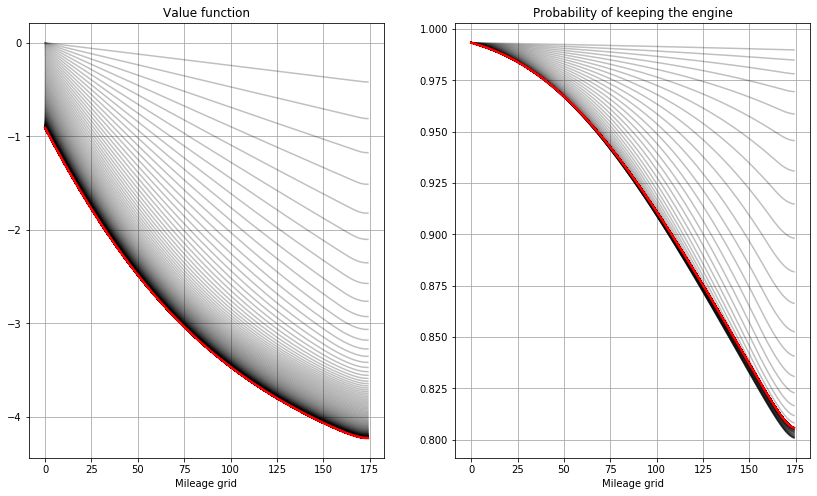

   iter              err    err_i/err_i-1
------------------------------------------
   0 nk   7.152965148291   7.152965148291
   1 nk   1.913859991531   0.267561766604
   2 nk   0.790229899249   0.412898489308
   3 nk   0.226491429559   0.286614603894
   4 nk   0.016526386231   0.072966938587
   5 nk   0.000080548075   0.004873907358
   6 nk   0.000000001872   0.000023241792
   7 nk   0.000000000000   0.000000948867


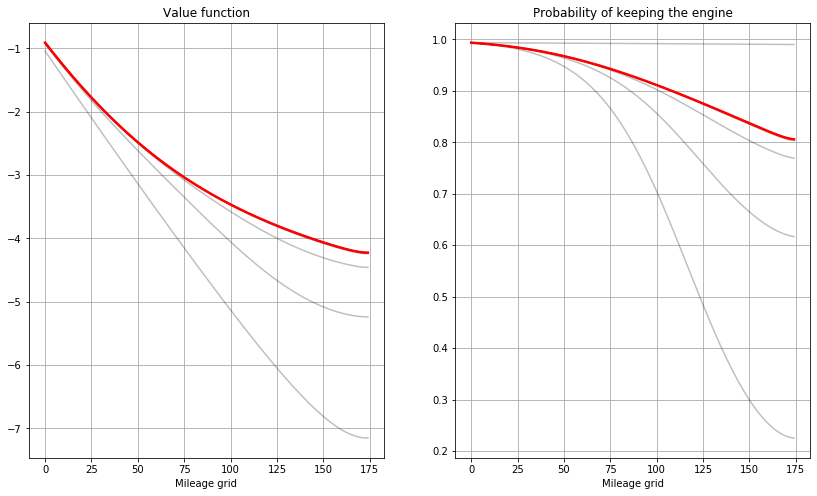

   iter              err    err_i/err_i-1
------------------------------------------
   0 sa   0.417013120838   0.417013120838
   1 sa   0.391156382625   0.937995384505
   2 sa   0.364795653493   0.932608209138
   3 sa   0.337661275230   0.925617594390
   4 sa   0.309635199474   0.916999437568
   5 sa   0.280823964802   0.906951035538
   6 sa   0.251604416635   0.895950660094
   7 sa   0.222586067037   0.884666771810
   8 sa   0.194507396121   0.873852522353
   9 sa   0.168198334063   0.864740042886
  10 sa   0.144819827300   0.861006312019
  11 sa   0.125909592015   0.869422332308
  12 sa   0.110610022016   0.878487653292
  13 sa   0.098043145524   0.886385733740
  14 sa   0.087585002036   0.893331212169
  15 sa   0.078778168806   0.899448158649
  16 sa   0.071286858195   0.904906261148
  17 sa   0.064851442426   0.909725075120
  18 sa   0.059279292857   0.914078247755
  19 sa   0.054415354060   0.917948771607
  20 nk   0.050137699439   0.921388830507
  21 nk   0.000562651038   0.0112

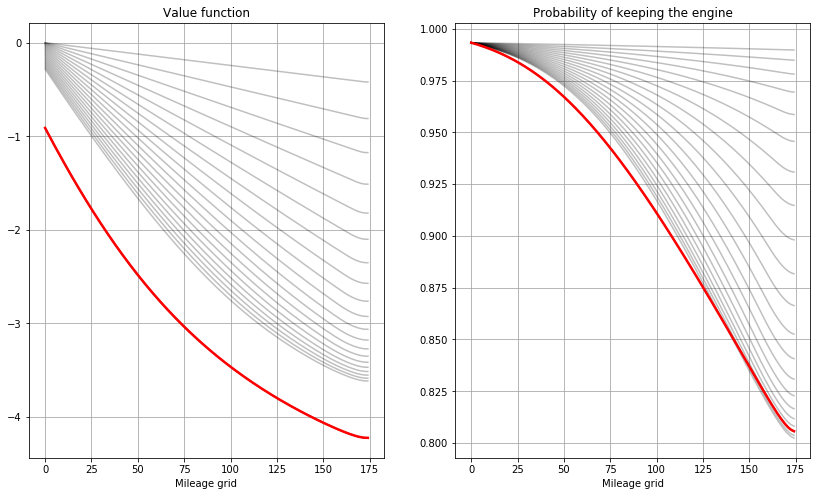

In [15]:
# compare SA, NK and polyalgorithm
m = zurcher(beta=0.95,RC=5.0)
ev,pk = m.solve_show(maxiter=1000,tol=1e-10)
ev,pk = m.solve_show(maxiter=1000,tol=1e-10,solver='nk')
polyset = {'sa_min':5,
           'sa_max':50,
           'switch_tol':0.03,
          }
ev,pk = m.solve_show(maxiter=100,tol=1e-10,solver='poly',**polyset)

Beta=0.750, VFI


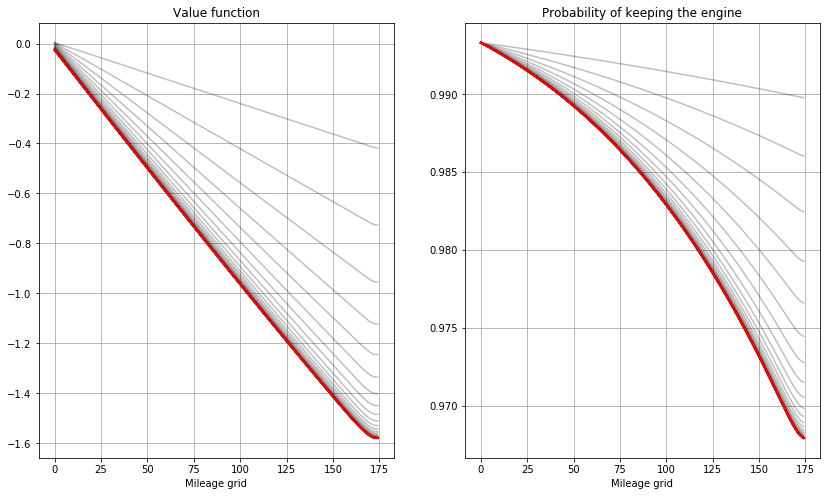

Beta=0.750, Polyalgorithm


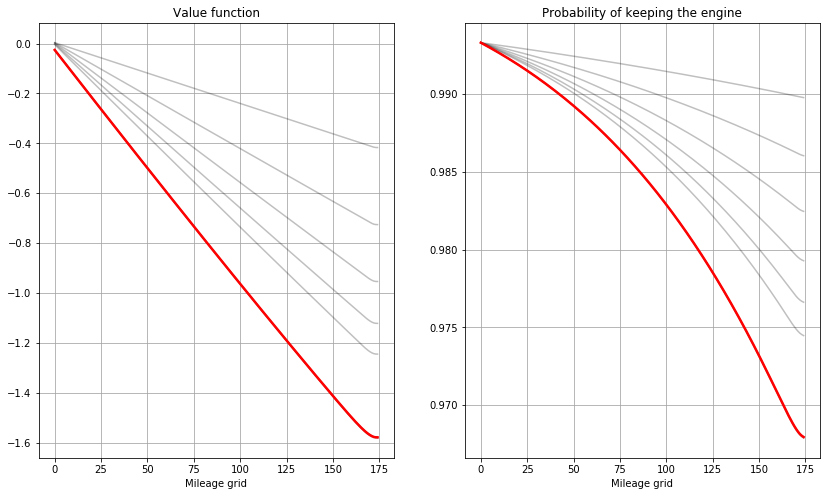

Beta=0.950, VFI


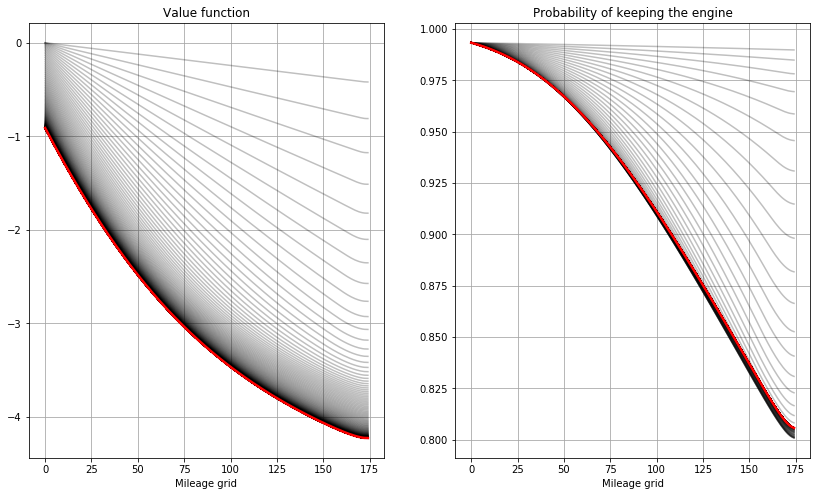

Beta=0.950, Polyalgorithm


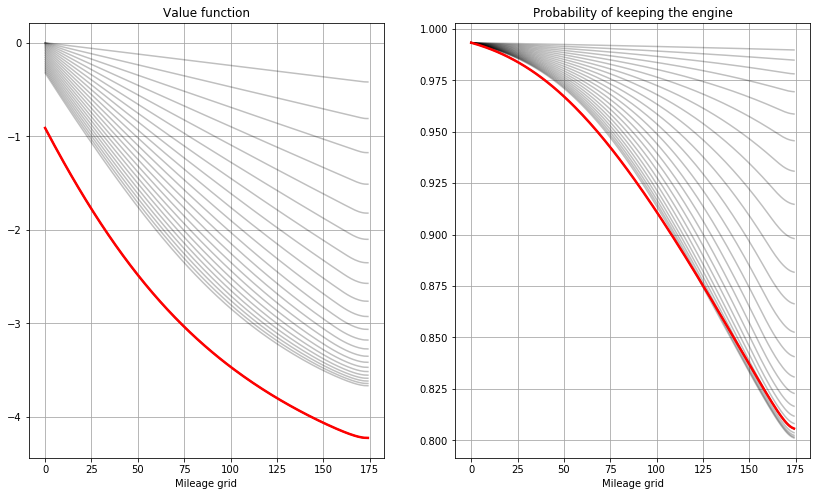

Beta=0.990, VFI


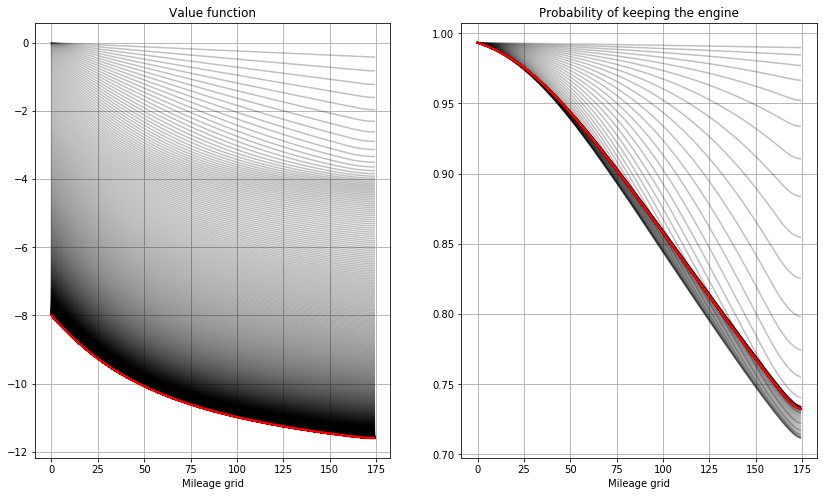

Beta=0.990, Polyalgorithm


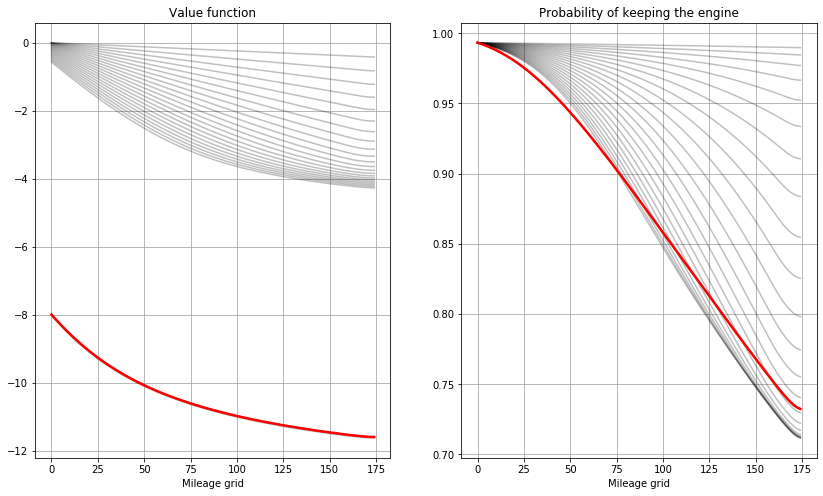

In [16]:
# compare convergence of SA, NK and polyalgorithm for different betas
m = zurcher(RC=5.0)
for beta in [0.75,0.95,0.99]:
    m.beta=beta
    print('Beta=%1.3f, VFI'%beta)
    ev,pk = m.solve_show(maxiter=5000,tol=1e-8,verbose=False)
    print('Beta=%1.3f, Polyalgorithm'%beta)
    ev,pk = m.solve_show(maxiter=5000,tol=1e-8,verbose=False,solver='poly')
    

# Next: form the MLE estimator

- Embed the polyalgorithm into the optimization loop over the parameter $\theta$
- Use quasi-Newton method to maximize the likelihood
- BHHH is a great way to approximate the Hessian needed for numerical optimization
- Provide analytical derivatives of the likelihood w.r.t. paramters $\theta$
- Use implicit function theorem to compute the derivative of the fixed point w.r.t. paramters $\theta$
- Reuse the Frechet derivative of Bellman operator using the chain rule

See **NFXP manual**: `papers/nfxp_manual.pdf` in the lectures repository

<img src="_static/nfxp_manual.png" style="width:800px;">

Further reading: 
- **Rust (1987) "Optimal Replacement of GMC Bus Engines: An Empirical Model of Harold Zurcher"**
- **NFXP manual** (*papers/nfxp_manual.pdf* in the lectures repository)